## IN4050 Mandatory Assignment 2, 2024: Supervised Learning

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Tuesday, October 29, 2024, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a regular Python script if you prefer.

#### Alternative 1
If you prefer not to use notebooks, you should deliver the code, your run results, and a PDF report where you answer all the questions and explain your work.

#### Alternative 2
If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs. (If you can't export: notebook -> latex -> pdf on your own machine, you may do this on the IFI linux machines.)

Here is a list of *absolutely necessary* (but not sufficient) conditions to get the assignment marked as passed:

- You must deliver your code (Python script or Jupyter notebook) you used to solve the assignment.
- The code used for making the output and plots must be included in the assignment. 
- You must include example runs that clearly shows how to run all implemented functions and methods.
- All the code (in notebook cells or python main-blocks) must run. If you have unfinished code that crashes, please comment it out and document what you think causes it to crash. 
- You must also deliver a pdf of the code, outputs, comments and plots as explained above.

Your report/notebook should contain your name and username.

Deliver one single compressed folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the assignment
The goal of this assignment is to get a better understanding of supervised learning with gradient descent. It will, in particular, consider the similarities and differences between linear classifiers and multi-layer feed forward neural networks (multi-layer perceptrons, MLP) and the differences and similarities between binary and multi-class classification. A significant part is dedicated to implementing and understanding the backpropagation algorithm. 

### Tools
The aim of the exercises is to give you a look inside the learning algorithms. You may freely use code from the weekly exercises and the published solutions. You should not use machine learning libraries like Scikit-Learn or PyTorch, because the point of this assignment is for you to implement things from scratch. You, however, are encouraged to use tools like NumPy and Pandas, which are not ML-specific.

The given precode uses NumPy. You are recommended to use NumPy since it results in more compact code, but feel free to use pure Python if you prefer. 

### Beware
This is a revised assignment compared to earlier years. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your own and explain them!

### Initialization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn # This is only to generate a dataset

## Datasets

We start by making a synthetic dataset of 2000 instances and five classes, with 400 instances in each class. (See https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html regarding how the data are generated.) We choose to use a synthetic dataset---and not a set of natural occuring data---because we are mostly interested in properties of the various learning algorithms, in particular the differences between linear classifiers and multi-layer neural networks together with the difference between binary and multi-class data. In addition, we would like a dataset with instances represented with only two numerical features, so that it is easy to visualize the data. It would be rather difficult (although not impossible) to find a real-world dataset of the same nature. Anyway, you surely can use the code in this assignment for training machine learning models on real-world datasets.

When we are doing experiments in supervised learning, and the data are not already split into training and test sets, we should start by splitting the data. Sometimes there are natural ways to split the data, say training on data from one year and testing on data from a later year, but if that is not the case, we should shuffle the data randomly before splitting. (OK, that is not necessary with this particular synthetic data set, since it is already shuffled by default by Scikit-Learn, but that will not be the case with real-world data) We should split the data so that we keep the alignment between X (features) and t (class labels), which may be achieved by shuffling the indices. We split into 50% for training, 25% for validation, and 25% for final testing. The set for final testing *must not be used* till the end of the assignment in part 3.

We fix the seed both for data set generation and for shuffling, so that we work on the same datasets when we rerun the experiments. This is done by the `random_state` argument and the `rng = np.random.RandomState(2024)`.

In [4]:
# Generating the dataset
from sklearn.datasets import make_blobs
X, t_multi = make_blobs(n_samples=[400, 400, 400, 400, 400], centers=[[0,1],[4,2],[8,1],[2,0],[6,0]], 
                  n_features=2, random_state=2024, cluster_std=[1.0, 2.0, 1.0, 0.5, 0.5])

In [5]:
# Shuffling the dataset
indices = np.arange(X.shape[0])
rng = np.random.RandomState(2024)
rng.shuffle(indices)
indices[:10]

array([ 937, 1776,  868, 1282, 1396,  147,  601, 1193, 1789,  547])

In [6]:
# Splitting into train, dev and test
X_train = X[indices[:1000],:]
X_val = X[indices[1000:1500],:]
X_test = X[indices[1500:],:]
t_multi_train = t_multi[indices[:1000]]
t_multi_val = t_multi[indices[1000:1500]]
t_multi_test = t_multi[indices[1500:]]

Next, we will  make a second dataset with only two classes by merging the existing labels in (X,t), so that `0`, `1` and `2` become the new `0` and `3` and `4` become the new `1`. Let's call the new set (X, t2). This will be a binary set.
We now have two datasets:

- Binary set: `(X, t2)`
- Multi-class set: `(X, t_multi)`

In [7]:
t2_train = t_multi_train >= 3
t2_train = t2_train.astype('int')
t2_val = (t_multi_val >= 3).astype('int')
t2_test = (t_multi_test >= 3).astype('int')

We can plot the two traning sets.

Text(0.5, 1.0, 'Multi-class set')

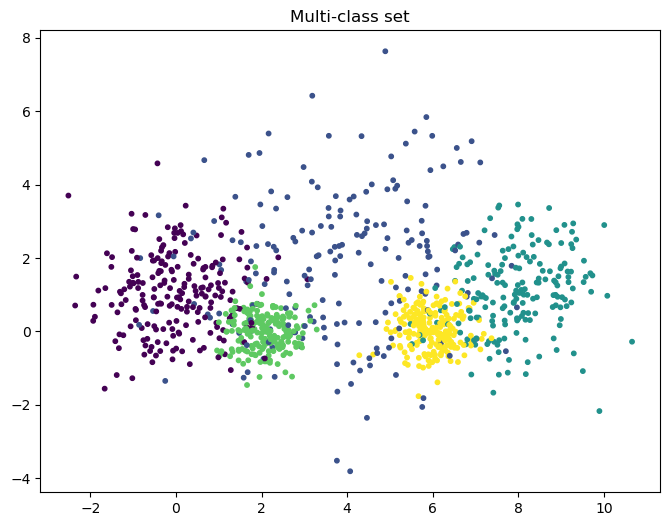

In [8]:
plt.figure(figsize=(8,6)) # You may adjust the size
plt.scatter(X_train[:, 0], X_train[:, 1], c=t_multi_train, s=10.0)
plt.title("Multi-class set")

Text(0.5, 1.0, 'Binary set')

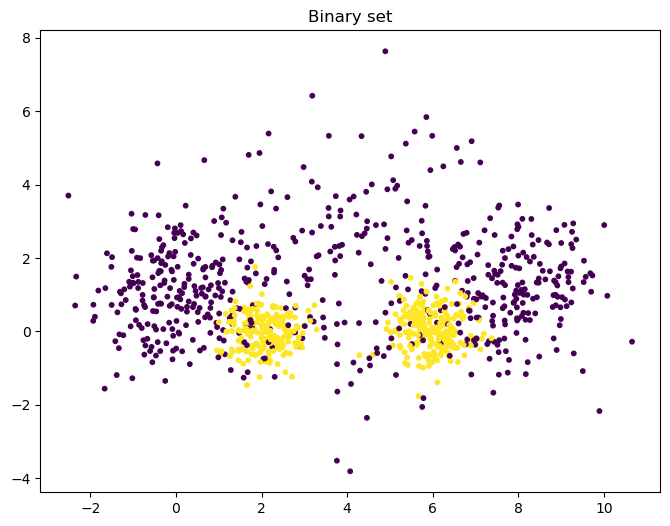

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=t2_train, s=10.0)
plt.title("Binary set")

# Part 1: Linear classifiers
### Linear regression

We see that even the binary set (X, t2) is far from linearly separable, and we will explore how various classifiers are able to handle this. We start with linear regression with the Mean Squared Error (MSE) loss, although it is not the most widely used approach for classification tasks: but we are interested. You may make your own implementation from scratch or start with the solution to the weekly exercise set 7. 
We include it here with a little added flexibility.

In [10]:
def add_bias(X, bias):
    """X is a NxM matrix: N datapoints, M features
    bias is a bias term, -1 or 1, or any other scalar. Use 0 for no bias
    Return a Nx(M+1) matrix with added bias in position zero
    """
    N = X.shape[0]
    biases = np.ones((N, 1)) * bias # Make a N*1 matrix of biases
    # Concatenate the column of biases in front of the columns of X.
    return np.concatenate((biases, X), axis  = 1) 

In [11]:
class NumpyClassifier():
    """Common methods to all Numpy classifiers --- if any"""

In [12]:
class NumpyLinRegClass(NumpyClassifier):

    def __init__(self, bias=-1):
        self.bias=bias
    
    def fit(self, X_train, t_train, lr = 0.1, epochs=10):
        """X_train is a NxM matrix, N data points, M features
        t_train is avector of length N,
        the target class values for the training data
        lr is our learning rate
        """
        
        if self.bias:
            X_train = add_bias(X_train, self.bias)
            
        (N, M) = X_train.shape
        
        self.weights = weights = np.zeros(M)
        
        for epoch in range(epochs):
            # print("Epoch", epoch)
            weights -= lr / N *  X_train.T @ (X_train @ weights - t_train)      
    
    def predict(self, X, threshold=0.5):
        """X is a KxM matrix for some K>=1
        predict the value for each point in X"""
        if self.bias:
            X = add_bias(X, self.bias)
        ys = X @ self.weights
        return ys > threshold

We can train and test a first classifier.

In [13]:
def accuracy(predicted, gold):
    return np.mean(predicted == gold)

In [14]:
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, epochs=3)
print("Accuracy on the validation set:", accuracy(cl.predict(X_val), t2_val))

Accuracy on the validation set: 0.58


The following is a small procedure which plots the data set together with the decision boundaries. 
You may modify the colors and the rest of the graphics as you like.
The procedure will also work for multi-class classifiers

In [15]:
def plot_decision_regions(X, t, clf=[], size=(8,6)):
    """Plot the data set (X,t) together with the decision boundary of the classifier clf"""
    # The region of the plane to consider determined by X
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Make a prediction of the whole region
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Classify each meshpoint.
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size) # You may adjust this

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap = 'Paired')

    plt.scatter(X[:,0], X[:,1], c=t, s=10.0, cmap='Paired')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision regions")
    plt.xlabel("x0")
    plt.ylabel("x1")

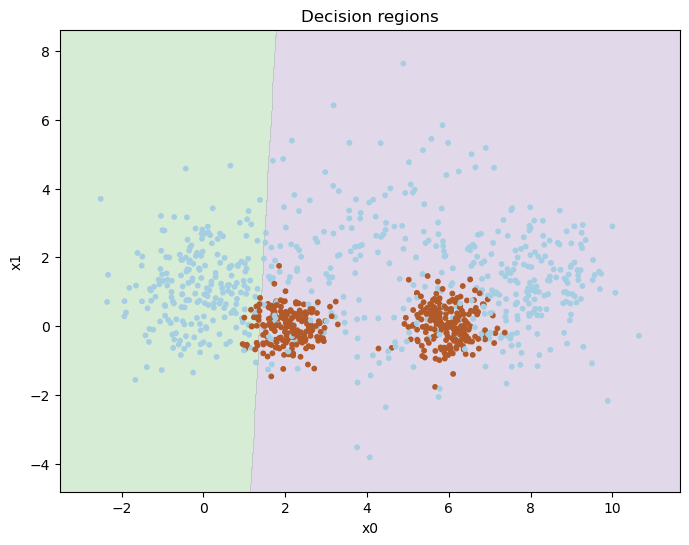

In [16]:
plot_decision_regions(X_train, t2_train, cl)

Best accuracy on the validation set: 0.604 for epoch: 1 and lr: 1e-05
Best accuracy on the validation set: 0.76 for epoch: 1 and lr: 1.0


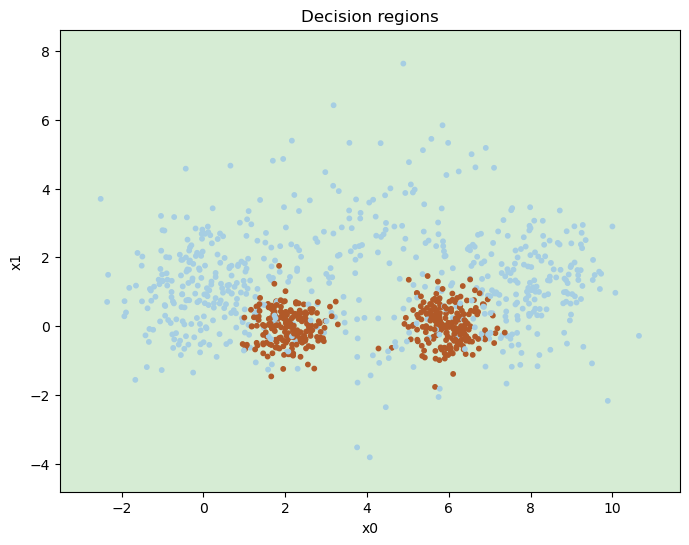

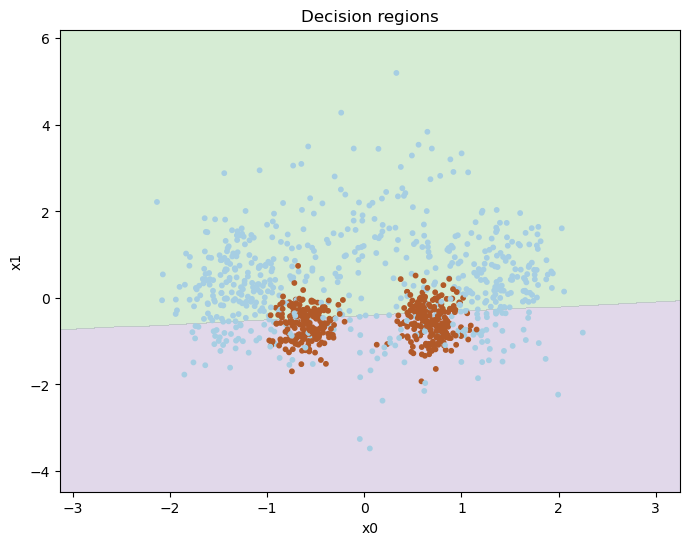

In [17]:
# Tuning - try various hyper parameters. Lr and epochs
lr = np.logspace(-5, 1, 7)
#lr = np.arange(0.01, 0.1, 0.01)
epochs = np.linspace(1, 10, 5).astype(int)

cl = NumpyLinRegClass()
acc_tab = np.zeros((len(lr), len(epochs)))
best_acc = 0.0
best_lr = 0
best_epoch = 0

for i, lr_ in enumerate(lr):
    for j, epoch in enumerate(epochs):
        #epoch = int(epoch)
        cl.fit(X_train, t2_train, epochs=epoch, lr=lr_)
        acc = accuracy(cl.predict(X_val), t2_val)
        acc_tab[i, j] = acc 

        if acc > best_acc:
            best_acc = acc
            best_lr = lr_
            best_epoch = epoch
print(f"Best accuracy on the validation set: {best_acc} for epoch: {best_epoch} and lr: {best_lr}")

# Visualized - see that no line does better than any. Meaning our data does not suit a linear classifier
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, epochs=best_epoch, lr=best_lr)
plot_decision_regions(X_train, t2_train, cl)

#print(f"x axis (epoch) : {epochs}")
#print(f"y axis (lr) : {lr}")
#print(acc_tab)

#print("We see that when we do zero learning it performs best. Learning rate dont really matter except for higher epochs. \n \n ")



# Scaling - standard scaler
def scaler(X_train_, X_val_, X_test_):
    # Scales data based on mean and std of training data
    mean = X_train_.mean(axis=0)
    std = X_train_.std(axis=0)
    
    X_train_scale= (X_train_ - mean)/std
    X_val_scale = (X_val_ - mean)/std
    X_test_scale = (X_test_ - mean)/std
    return X_train_scale, X_val_scale, X_test_scale

#Scale data for rest of excersises
X_train, X_val , X_test = scaler(X_train, X_val, X_test)


cl = NumpyLinRegClass()
acc_tab_scaled = np.zeros((len(lr), len(epochs)))
best_acc = 0.0
best_lr = 0
best_epoch = 0

for i, lr_ in enumerate(lr):
    for j, epoch in enumerate(epochs):
        #epoch = int(epoch)
        cl.fit(X_train, t2_train, epochs=epoch, lr=lr_)
        acc = accuracy(cl.predict(X_val), t2_val)
        acc_tab_scaled[i, j] = acc 

        if acc > best_acc:
            best_acc = acc
            best_lr = lr_
            best_epoch = epoch
print(f"Best accuracy on the validation set: {best_acc} for epoch: {best_epoch} and lr: {best_lr}")

# Visualized - see that no line does better than any. Meaning our data does not suit a linear classifier
cl = NumpyLinRegClass()
cl.fit(X_train, t2_train, epochs=best_epoch, lr=best_lr)
plot_decision_regions(X_train, t2_train, cl)

#print(f"x axis (epoch) : {epochs}")
#print(f"y axis (lr) : {lr}")
#print(acc_tab_scaled)


# To see difference between scaled and non scaled
#print("See that generalle scaled performs better by printing out difference in accuracy table")
#print(acc_tab_scaled - acc_tab)



# Notebook Kernel Issues

Notebook kernel issues can cause problems where sometimes it doesn't run properly. Here are the printed results for this task.
So i would constantly get wrong results. If you want to run just comment in the print statements where i print(acc_tab) and print(acc_tab_scaled)

## Results for Default Search

**Best accuracy on the validation set:** 0.604 for epoch: 1 and lr: 1e-05.  
Plotted, we see no line is drawn.

### Axes Information
- **X-axis (Epochs):** [1, 3, 5, 7, 10]
- **Y-axis (Learning Rates):** [1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]

### Accuracy Table (Default)
| Learning Rate | Epoch 1 | Epoch 3 | Epoch 5 | Epoch 7 | Epoch 10 |
|---------------|---------|---------|---------|---------|----------|
| **1e-05**     | 0.604   | 0.604   | 0.604   | 0.604   | 0.604    |
| **1e-04**     | 0.604   | 0.604   | 0.604   | 0.604   | 0.604    |
| **1e-03**     | 0.604   | 0.604   | 0.604   | 0.604   | 0.604    |
| **1e-02**     | 0.604   | 0.604   | 0.598   | 0.540   | 0.470    |
| **1e-01**     | 0.456   | 0.580   | 0.530   | 0.494   | 0.542    |
| **1e+00**     | 0.486   | 0.466   | 0.466   | 0.466   | 0.534    |
| **1e+01**     | 0.476   | 0.466   | 0.466   | 0.466   | 0.534    |

---

## Results with Scaling

**Best accuracy on the validation set:** 0.76 for epoch: 1 and lr: 1.0.  
We see that data points are scaled, and the center is around 0. While the linear classifier doesn't make much sense for our data, it performed better with scaling.

### Accuracy Table (Scaled)
| Learning Rate | Epoch 1 | Epoch 3 | Epoch 5 | Epoch 7 | Epoch 10 |
|---------------|---------|---------|---------|---------|----------|
| **1e-05**     | 0.604   | 0.604   | 0.604   | 0.604   | 0.604    |
| **1e-04**     | 0.604   | 0.604   | 0.604   | 0.604   | 0.604    |
| **1e-03**     | 0.604   | 0.604   | 0.604   | 0.604   | 0.604    |
| **1e-02**     | 0.604   | 0.604   | 0.604   | 0.604   | 0.604    |
| **1e-01**     | 0.604   | 0.604   | 0.604   | 0.602   | 0.602    |
| **1e+00**     | 0.76    | 0.76    | 0.76    | 0.76    | 0.76     |
| **1e+01**     | 0.472   | 0.456   | 0.460   | 0.464   | 0.532    |

---

## Difference Between Scaled and Default Table
```plaintext
| Learning Rate | Epoch 1 | Epoch 3 | Epoch 5 | Epoch 7 | Epoch 10 |
|---------------|---------|---------|---------|---------|----------|
| **1e-05**     | 0.000   | 0.000   | 0.000   | 0.000   | 0.000    |
| **1e-04**     | 0.000   | 0.000   | 0.000   | 0.000   | 0.000    |
| **1e-03**     | 0.000   | 0.000   | 0.000   | 0.000   | 0.


### Task: Tuning

The result is far from impressive. 
Remember that a classifier which always chooses the majority class will have an accuracy of 0.6 on this data set.

Your task is to try various settings for the two training hyper-parameters, learning rate and the number of epochs, to get the best accuracy on the validation set. 

Report how the accuracy varies with the hyper-parameter settings. It it not sufficient to give the final hyperparameters. You must also show how you found then and results for alternative values you tried aout.

When you are satisfied with the result, you may plot the decision boundaries, as above.

### Task: Scaling

We have seen in the lectures that scaling the data may improve training speed and sometimes the performance. 

- Implement a scaler, at least the standard scaler (normalizer), but you can also try other techniques
- Scale the data
- Train the model on the scaled data
- Experiment with hyper-parameter settings and see whether you can speed  up  the training.
- Report final hyper-parameter settings and show how you found them.

## Logistic regression
a) You should now implement a logistic regression classifier similarly to the classifier based on linear regression.
You may use the code from the solution to weekly exercise set week07.

b) In addition to the method `predict()` which predicts a class for the data, include a method `predict_probability()` which predict the probability of the data belonging to the positive class.

c) So far, we have not calculated the loss explicitly in the code. Extend the code to calculate the loss on the training set for each epoch and to store the losses such that the losses can be inspected after training. The prefered loss for logistic regression is binary cross-entropy, but you can also try mean squared error. The most important is that your implementation of the loss corresponds to your implementation of the gradient descent.
Also, calculate and store accuracies after each epoch.

d) In addition, extend the `fit()` method with optional arguments for a validation set (X_val, t_val). If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch. 

e) The training runs for a number of epochs. We cannot know beforehand for how many epochs it is reasonable to run the training. One possibility is to run the training until the learning does not improve much. Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved with more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Also, add an attribute to the classifier which tells us after fitting how many epochs it was trained for.

f) Train classifiers with various learning rates, and with varying values for `tol` for finding the optimal values. Also consider the effect of scaling the data.

g) After a succesful training, for your best model, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see. Are the curves monotone? Is this as expected?

In [18]:
    # Log regression - from week 07 excersise and added bias same way as LinReg class

    class NumpyLogReg(NumpyClassifier):
        def __init__(self, bias=-1):
            self.bias = bias
            self.losses = []
            self.accs = []
            self.val_losses = []
            self.val_accs = []
            self.num_epochs_trained = 0
            

        def fit(self, X_train, t_train, X_val = None, t_val = None, eta=0.1, epochs=10, tol=1, n_epochs_no_update=5):
            """X_train is a Nxm matrix, N data points, m features
            t_train is avector of length N,
            the targets values for the training data"""

            if self.bias:
                X_train = add_bias(X_train, self.bias)
                if X_val is not None:
                    X_val = add_bias(X_val, self.bias)

            (N, m) = X_train.shape
            self.weights = np.zeros(m )
            
            epochs_w_noImprovement = 0
            best_loss = 0
            for epoch in range(epochs):
                gradient = X_train.T @ (self.forward(X_train) - t_train) / N
                self.weights -= eta * gradient

                #Loss calc adn add to list stored in class
                training_loss = self.cross_entropy(t_train, self.forward(X_train)) #calc cross entropy for target vs output of model
                self.losses.append(training_loss)
                #Accuracy calc
                training_acc = self.accuracy(self.predict(X_train, training=True), t_train)
                self.accs.append(training_acc)

                #check if latest loss has improved less than tolerance than previous best loss

                if (abs(best_loss - training_loss) ) < tol:
                    epochs_w_noImprovement +=1
                    if epochs_w_noImprovement == n_epochs_no_update:
                        #print(f"No longer imrpoves at {epoch}")
                        break
                        #continue
                else:
                    epochs_w_noImprovement = 0 #reset if there has been big improvement
                    best_loss = training_loss

                if X_val is not None:
                    val_loss = self.cross_entropy(t_val, self.forward(X_val))
                    self.val_losses.append(val_loss)
                    val_acc = self.accuracy(self.predict(X_val, training=True), t_val)
                    self.val_accs.append(val_acc)

                self.num_epochs_trained += 1

        def forward(self, X):
            """Forward pass using logistic"""
            return self.logistic(X @ self.weights)

        def predict(self, X, threshold=0.5, training = False):
            """X is a Kxm matrix for some K>=1 predict the value for each point in X"""
            if not training:
                X = add_bias(X, self.bias)
                
            return (self.forward(X) > threshold).astype(int)

        def logistic(self, z):
            """Sigmoidd"""
            return 1 / (1 + np.exp(-z))
        
        def predict_prob(self, X, training = False):
            """Return propability instead of determined class by a threshhold"""
            if not training:
                X = add_bias(X, self.bias)
            return self.forward(X)
        
        def cross_entropy(self,t,p): 
            """Cross entropy loss for binary classification. gpt"""
            epsilon = 1e-16
            p = np.clip(p, epsilon, 1 - epsilon)
            return(-np.mean(t*np.log(p)+ (1-t)*np.log(1-p)))

        
        def accuracy(self, y, t):
            """Calculate the accuracy of the model, model output and target"""
            # From week05 solution, vector solution
            return np.mean( y == t )

Best accuracy on the validation set: 0.7620 for epoch: 10 and lr: 5.0000e-02
Doesent seem to get that much better when training, but we do get bette peformeance in general for diverse number of paramters. Even if best model dont improve much.


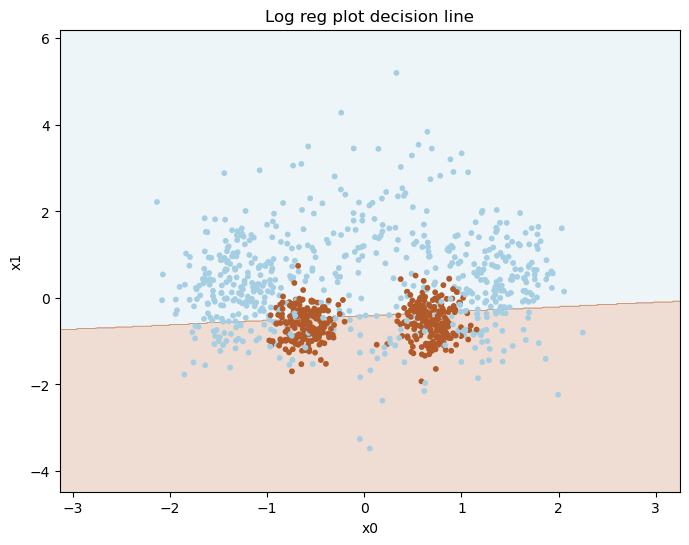

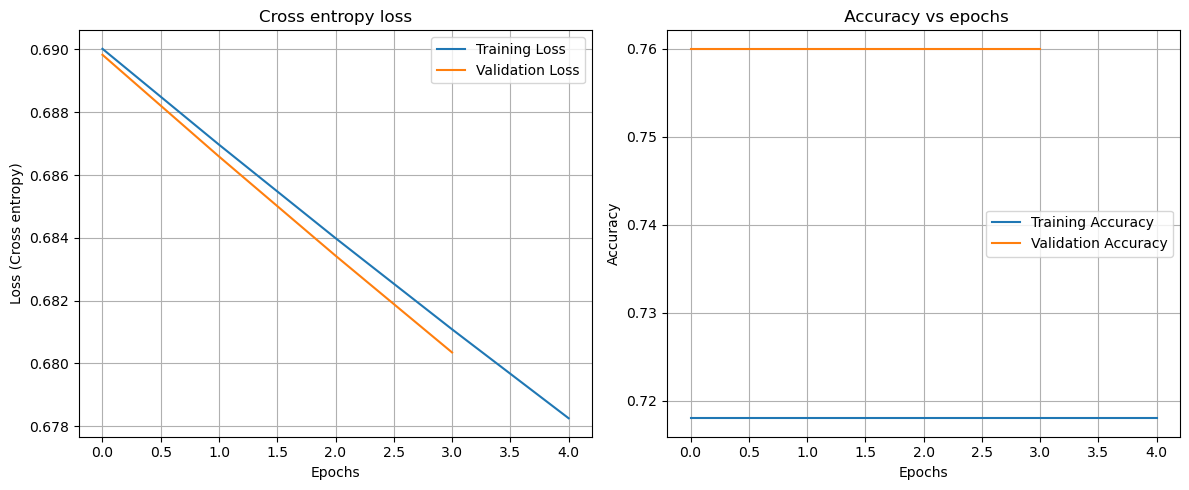

[[0.76  0.76  0.76 ]
 [0.76  0.76  0.76 ]
 [0.76  0.76  0.76 ]
 [0.76  0.76  0.76 ]
 [0.762 0.762 0.762]
 [0.762 0.762 0.762]
 [0.762 0.762 0.762]
 [0.762 0.762 0.762]
 [0.762 0.762 0.762]]
See in table that acc dont increase much regardless of choice of lr and the training stops quite quickly meaning we reached max loss quite fast.


In [19]:
# Running logreg
X_train, X_val , X_test = scaler(X_train, X_val, X_test) #scale

# Tuning - try various hyperparameters: learning rate and epochs
#lrs = np.logspace(-3, 1, 5)
lrs = np.arange(0.01, 0.1, 0.01)
epochs_range = np.logspace(1, 2, 3).astype(int)  

cl = NumpyLogReg(bias=-1)  # Initialize classifier with bias
acc_tab = np.zeros((len(lrs), len(epochs_range)))
best_acc = 0.0
best_lr = 0
best_epoch = 0

for i, lr in enumerate(lrs):
    for j, epoch in enumerate(epochs_range):
        cl.fit(X_train, t2_train, X_val=X_val, t_val=t2_val, eta=lr, epochs=epoch)
        acc = cl.accuracy(cl.predict(X_val), t2_val)  
        acc_tab[i, j] = acc

        if acc > best_acc:
            best_acc = acc
            best_lr = lr
            best_epoch = epoch

print(f"Best accuracy on the validation set: {best_acc:.4f} for epoch: {best_epoch} and lr: {best_lr:.4e}")
print(f"Doesent seem to get that much better when training, but we do get bette peformeance in general for diverse number of paramters. Even if best model dont improve much.")

# run with best hyperparameters
best_cl = NumpyLogReg(bias=-1)
best_cl.fit(X_train, t2_train, X_val=X_val, t_val=t2_val, eta=best_lr, epochs=best_epoch)
#best_cl.fit(X_train, t2_train, X_val=X_val, t_val=t2_val, eta=1, epochs=100)

# Plot
plot_decision_regions(X_train, t2_train, best_cl)
plt.title("Log reg plot decision line")
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_cl.losses, label='Training Loss')
plt.plot(best_cl.val_losses, label='Validation Loss')
plt.title('Cross entropy loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Cross entropy)')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(best_cl.accs, label='Training Accuracy')
plt.plot(best_cl.val_accs, label='Validation Accuracy')
plt.title(' Accuracy vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#Table
print(acc_tab)
print("See in table that acc dont increase much regardless of choice of lr and the training stops quite quickly meaning we reached max loss quite fast.")

#print(best_cl.losses)

## Multi-class classifiers
We turn to the task of classifying when there are more than two classes, and the task is to ascribe one class to each input. We will now use the set (X, t_multi).

### "One-vs-rest" with logistic regression
We saw in the lectures how a logistic regression classifier can be turned into a multi-class classifier using the one-vs-rest approach. We train one logistic regression classifier for each class. To predict the class of an item, we run all the binary classifiers and collect the probability score from each of them. We assign the class which ascribes the highest probability.

Build such a classifier. Train the resulting classifier on (X_train, t_multi_train), test it on (X_val, t_multi_val), tune the hyper-parameters and report the accuracy.

Also plot the decision boundaries for your best classifier similarly to the plots for the binary case.

In [20]:
class CustomOvRClassifier:
    def __init__(self):
        self.models = []

        
    def fit(self, X, t, num_classes, eta=0.1, epochs=100, **kwargs):
        """Fits a binary classifier for each class using a one-vs-rest approach."""
        for class_label in range(num_classes):
            # Binary target setup for the current class vs others
            binary_target = (t == class_label).astype(int)
            
            # create and fit
            model = NumpyLogReg(**kwargs)  
            model.fit(X, binary_target, eta=eta, epochs=epochs)
            self.models.append(model)

    
    def predict(self, X):
        """Predicts the class with the highest probability score across classifiers."""
        # Collect scores from each binary classifier
        class_scores = np.array([model.predict_prob(X) for model in self.models]).T  
        # Return the class with the highest probability score for each sample
        #print(class_scores)
        print(np.argmax(class_scores, axis=1))
        return np.argmax(class_scores, axis=1)
    

# Train
num_classes = np.unique(t_multi_train).size
custom_ovr = CustomOvRClassifier()
custom_ovr.fit(X_train, t_multi_train, num_classes, eta=0.8, epochs=1000)



# predict and acc calc
val_predictions = custom_ovr.predict(X_val)
print("Validation accuracy:", accuracy(val_predictions, t_multi_val))


[0 4 0 2 3 2 2 0 0 2 4 2 2 2 3 4 2 2 1 0 2 2 0 3 2 0 2 1 1 3 2 0 0 0 0 1 2
 0 2 0 4 3 0 0 4 0 1 3 2 1 3 2 3 4 2 0 0 4 2 3 3 0 0 0 3 0 4 2 0 1 2 0 1 2
 2 4 4 0 4 0 2 0 4 0 3 0 4 2 0 1 0 0 0 4 2 1 2 1 4 0 1 0 0 0 4 0 2 2 2 0 2
 1 4 2 2 0 2 2 4 3 0 2 4 2 4 0 3 0 3 0 0 0 0 4 2 0 2 0 3 0 3 2 0 0 2 4 2 0
 0 4 3 1 4 0 0 0 2 3 4 0 2 2 3 1 2 3 0 0 0 3 3 1 2 4 2 2 3 4 2 1 3 2 2 4 3
 0 2 0 0 2 4 1 4 3 4 2 4 0 3 2 0 2 3 2 2 2 4 0 4 4 0 3 0 4 0 4 4 2 4 4 4 0
 1 0 2 0 2 3 0 2 0 1 3 4 0 2 2 3 0 2 0 1 0 2 4 3 2 2 0 0 1 2 2 2 4 0 2 0 2
 2 0 2 0 3 0 2 4 2 0 2 1 4 4 4 4 0 1 0 0 0 0 1 2 0 4 0 4 0 2 2 3 3 2 2 2 0
 1 4 2 4 2 0 3 0 2 2 2 2 4 4 2 3 2 0 1 0 4 2 2 3 4 0 4 0 0 3 0 2 2 4 2 0 2
 2 1 0 4 4 3 1 2 4 4 4 2 2 4 3 0 0 4 1 4 0 2 4 0 0 4 2 2 4 2 0 4 0 2 0 2 3
 1 0 0 2 0 2 2 0 2 2 0 2 2 4 0 4 1 2 2 4 4 0 0 0 3 4 0 4 0 2 0 4 2 1 4 4 0
 0 0 1 4 0 4 2 1 2 0 2 0 1 3 1 3 1 2 0 0 4 4 1 0 1 0 3 1 0 0 4 0 4 4 4 2 0
 0 4 0 0 0 0 2 1 4 4 0 3 0 0 0 2 2 0 4 2 2 3 4 2 0 2 3 0 2 2 0 2 3 2 4 2 2
 0 3 2 2 0 0 3 3 4 2 2 2 

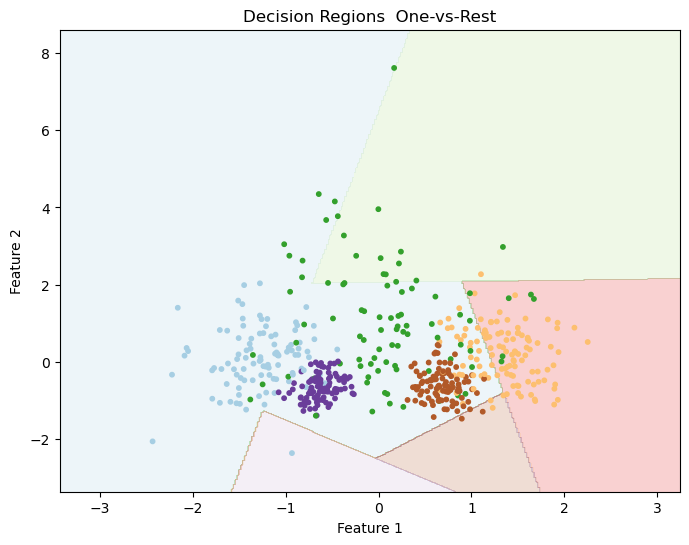

Seemingly not very successful as it just has 44 percent accuracy, couldnt quite figure out why.


In [21]:
# Plot multi
def plot_decision_regions_multi(X, t, clfs, size=(8, 6)): #Slightly edited version of plot for 1 classification, edited towards workingfor multiple classes
    """
    Help from fellow student with this code.
    Plot the dataset (X, t) together with the decision boundaries of the classifiers in clfs.

    X: Data features
    t: Target labels
    clfs: List of classifiers, each one being a binary classifier as part of the one-vs-rest scheme.
    size: Size of the plot
    """

    # Define the mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # Step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict class for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    class_probs = np.array([clf.predict(grid_points) for clf in clfs])  # Class probabilities, assigning different class probabilites for each point, #this is the biggest difference
    Z = np.argmax(class_probs, axis=0)  # Class with the highest probability

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size)

    # Put the result into a color plot
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='Paired')

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=t, s=10.0, cmap='Paired')

    # Define plot range and titles
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Regions  One-vs-Rest")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")


plot_decision_regions_multi(X_val, t_multi_val, custom_ovr.models)

plt.show()

print("Seemingly not very successful as it just has 44 percent accuracy, couldnt quite figure out why.")


### Multinomial logistic regression
In the lectures, we contrasted the one-vs-rest approach with the multinomial logistic regression, also called softmax classifier. Implement also this classifier, tune the parameters, and compare the results to the one-vs-rest classifier. (Don't expect a large difference on a simple task like this.)

Remember that this classifier uses softmax in the forward phase. For loss, it uses categorical cross-entropy loss. The loss has a somewhat simpler form than in the binary case. To calculate the gradient is a little more complicated. The actual gradient and update rule is simple, however, as long as you have calculated the forward values correctly.

Accuracy for test data 0.662:
Accuracy for validation data: 0.194


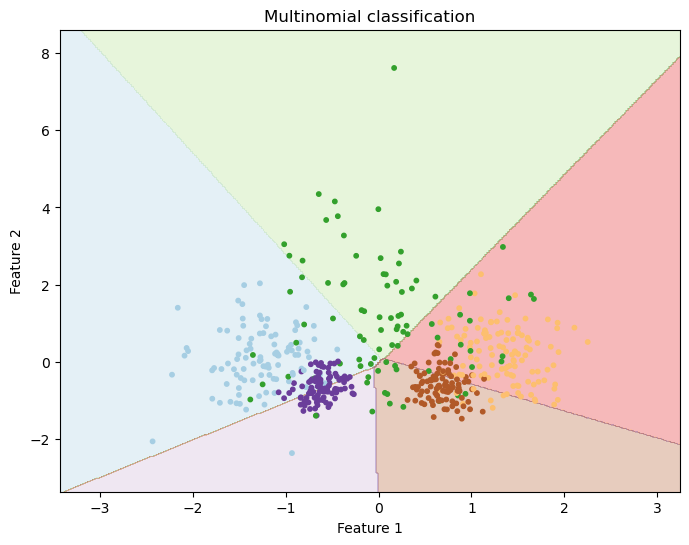

In [22]:
# Multi class - used code given in group session

# Plot multi-class decision boundaries for OvRWrapper classifier
def plot_decision_regions_multi(X, t, ovr_model, size=(8, 6)):
    """
    Modified slighly from previous code.
    Plot the dataset (X, t) together with the decision boundaries of the classifiers in ovr_model.
    
    X: Data features
    t: Target labels
    ovr_model: OvRWrapper model with trained binary classifiers for each class.
    size: Size of the plot
    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    prob_matrix = []
    
    # collect predicts from different classifiers
    for label, clf in ovr_model.clfs.items():
        prob = clf.predict_prob(grid_points).reshape(-1, 1)
        prob_matrix.append(prob)
    
    # choose the class with the highest probability at each grid pt.
    prob_matrix = np.hstack(prob_matrix)
    Z = ovr_model.labels[np.argmax(prob_matrix, axis=1)]
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=size)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Paired')
    # Scatter plot of the actual data points
    plt.scatter(X[:, 0], X[:, 1], c=t, s=10.0, cmap='Paired')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Multinomial classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

"""
With some help gpt.
Class OvRWrapper inherits from NumpyClassifier:

Method __init__(base_classifier defaults to NumpyLogReg, bias defaults to -1):
    Set the classifier attribute to base_classifier
    Set the bias attribute to bias

Method fit(X_train, t_train, **kwargs):
    Get unique labels from t_train and store them in labels
    Initialize an empty dictionary base_classifiers
    Initialize an empty list rounds
    
    For each label in labels:
        Create a binary target vector t_bin_train where current label is 1 and others are 0
        Initialize a new classifier instance clf
        Train clf using X_train and t_bin_train, passing additional keyword arguments
        Store clf in base_classifiers with current label as the key
        Append the number of training rounds from clf to rounds

Method predict(x):
    For each label in labels:
        Predict probabilities for x using the classifier corresponding to the current label
        Reshape predictions to column format
        
    Concatenate all probability predictions into a matrix
    Return the index of the highest probability in each row (the predicted class)

"""


class OvRWrapper(NumpyClassifier):
    #help with gpt and code from group session: 
    def __init__(self, base_clf=NumpyLogReg, bias=-1):
        self.base_clf = base_clf
        self.bias = bias
        self.clfs = {}  # classifiers
        self.labels = []  # stoes labels for each class
        self.epochs = []  

    def fit(self, X, t):
        self.labels = np.unique(t)
        self.clfs = {}
        self.epochs = []

        for lbl in self.labels:
            # Create a binary target vector where current label is 1 and others are 0
            t_bin = np.where(t == lbl, 1, 0)
            
            # Initialize and train classifier for the current class
            clf = self.base_clf(bias=self.bias)
            clf.fit(X, t_bin)
            
            # Store the trained classifier
            self.clfs[lbl] = clf
            self.epochs.append(getattr(clf, 'num_epochs_trained', None))

    def predict(self, x):
        prob_matrix = []
        for lbl in self.labels:
            # Access the classifier for the current label
            clf = self.clfs[lbl]
            # Predict probability for the current label
            prob = clf.predict_prob(x).reshape(-1, 1)
            prob_matrix.append(prob)

        # Combine probabilities across classifiers and select the label with the highest probability
        prob_matrix = np.hstack(prob_matrix)
        return self.labels[np.argmax(prob_matrix, axis=1)]

# Initialize and train the OvRWrapper
ovr_model = OvRWrapper(base_clf=NumpyLogReg, bias=-1)
ovr_model.fit(X_train, t_multi_train)

# calc acc on test and validation data
predictions = ovr_model.predict(X_test)
test_acc = accuracy(predictions, t_multi_test)
print(f"Accuracy for test data {test_acc}:")

predictions_val = ovr_model.predict(X_val)
val_acc = accuracy(predictions_val, t_multi_test)
print(f"Accuracy for validation data: {val_acc}")


plot_decision_regions_multi(X_val, t_multi_val, ovr_model)
plt.show()


# Part 2: Multi-layer neural networks

## A first non-linear classifier

The following code is a simple implementation of a multi-layer perceptron or feed-forward neural network.
For now, it is quite restricted.
There is only one hidden layer.
It can only handle binary classification.
In addition, it uses a simple final layer similar to the linear regression classifier above.
One way to look at it is what happens when we add a hidden layer to the linear regression classifier.

The MLP class below misses the implementation of the `forward()` function. Your first task is to implement it. 

Remember that in the forward pass, we "feed" the input to the model, the model processes it and produces the output. The function should make use of the logistic activation function and bias.

In [23]:
# First, we define the logistic function and its derivative:
def logistic(x):
    return 1/(1+np.exp(-x))

def logistic_diff(y):
    return y * (1 - y)

In [ ]:
class MLPBinaryLinRegClass(NumpyClassifier):
    """A multi-layer neural network with one hidden layer"""
    
    def __init__(self, bias=-1, dim_hidden = 6):
        """Intialize the hyperparameters"""
        self.bias = bias
        # Dimensionality of the hidden layer
        self.dim_hidden = dim_hidden
        
        self.activ = logistic
        
        self.activ_diff = logistic_diff
        
    def forward_(self, X):
        """TODO: 
        Perform one forward step. 
        Return a pair consisting of the outputs of the hidden_layer
        and the outputs on the final layer"""
        
        hidden_outs = X @ self.weights1
        hidden_ = add_bias(hidden_outs, self.bias)
        outputs = hidden_ @ self.weights2
        return hidden_outs, outputs
    
    def forward(self, X):
        """Perform one forward step and return the outputs of the hidden and final layers."""
        # Calculate the output of the hidden layer
        hidden_outs = self.activ(X @ self.weights1)
        # Add bias term to the hidden layer's output
        hidden_outs_bias = add_bias(hidden_outs, self.bias)
        # Calculate the final layer output
        outputs = hidden_outs_bias @ self.weights2
        return hidden_outs_bias, outputs
    
    def fit(self, X_train, t_train, X_val=None, t_val=None, lr=0.001, epochs = 100, n_epochs_no_update = 10, tol = 0.001):
        """Initialize the weights. Train *epochs* many epochs.
        
        X_train is a NxM matrix, N data points, M features
        t_train is a vector of length N of targets values for the training data, 
        where the values are 0 or 1.
        lr is the learning rate
        """
        self.lr = lr
        self.train_loss = []
        self.train_acc = []
        self.val_losses = []
        self.val_accs = []
        
        # Turn t_train into a column vector, a N*1 matrix:
        T_train = t_train.reshape(-1,1)
            
        dim_in = X_train.shape[1] 
        dim_out = T_train.shape[1]
        
        # Initialize the weights
        self.weights1 = (np.random.rand(
            dim_in + 1, 
            self.dim_hidden) * 2 - 1)/np.sqrt(dim_in)
        self.weights2 = (np.random.rand(
            self.dim_hidden+1, 
            dim_out) * 2 - 1)/np.sqrt(self.dim_hidden)
        X_train_bias = add_bias(X_train, self.bias)
        
        epochs_w_noImprovement = 0
        for e in range(epochs):
            # One epoch
            # The forward step:
            hidden_outs, outputs = self.forward(X_train_bias)
            # The delta term on the output node:
            out_deltas = (outputs - T_train)
            # The delta terms at the output of the hidden layer:
            hiddenout_diffs = out_deltas @ self.weights2.T
            # The deltas at the input to the hidden layer:
            hiddenact_deltas = (hiddenout_diffs[:, 1:] * 
                                self.activ_diff(hidden_outs[:, 1:]))  

            # Update the weights:
            self.weights2 -= self.lr * hidden_outs.T @ out_deltas
            self.weights1 -= self.lr * X_train_bias.T @ hiddenact_deltas

            tr_loss = self.cross_entropy(t_train , self.predict_probability(X_train)) #loss is cross entropy of targets vs output of model proability
            self.train_loss.append(tr_loss)
            tr_acc = self.accuracy(self.predict(X_train), t_train)

            if X_val is not None:
                val_loss = self.cross_entropy(t_val, self.predict_probability(X_val))
                self.val_losses.append(val_loss)
                val_acc = self.accuracy(self.predict(X_val), t_val)
                self.val_accs.append(val_acc)

            if (abs( min(self.train_loss) - tr_loss) ) < tol:
                epochs_w_noImprovement +=1
                if epochs_w_noImprovement == n_epochs_no_update:
                    #print(f"No longer imrpoves at {epoch}")
                    break
                    #continue
            else:
                epochs_w_noImprovement = 0 #reset if there has been big improvement

            

    def predict(self, X):
        """Predict the class for the members of X"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        score = forw[:, 0]
        return (score > 0.5)

    def predict_probability(self, X):
        """Add bias and send output of forward into activation sigmoid to get probability"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        prob = logistic(forw)
        return prob
    
    def cross_entropy(self, t, probs):
        """Binary cross-entropy loss for binary classification."""
        # Ensure targets are a column vector
        t = t.reshape(-1, 1)
        # Calculate binary cross-entropy loss directly
        loss = -np.mean(t * np.log(probs + 1e-15) + (1 - t) * np.log(1 - probs + 1e-15))
        return loss

    def accuracy(self, y, t):
        """Calculate the accuracy of the model, model output and target"""
        # From week05 solution, vector solution
        return np.mean( y == t )

In [37]:

# hyperparamter search
learning_rates = np.logspace(-3, 1, 5)  #
learning_rates = np.linspace(0.01, 0.4, 10)
hidden_dims = [5, 10, 20]                
tolerances = [0.001, 0.01, 0.1]  

best_acc  = 0
best_lr = 0
best_dim = 0
best_tol = 0

for i, lr in enumerate(learning_rates):
    for j, dim_hidden_ in enumerate(hidden_dims):
        for k, tol in enumerate(tolerances):
            model = MLPBinaryLinRegClass(bias=-1, dim_hidden=dim_hidden_)
            model.fit(X_train, t_multi_train, X_val=X_val, t_val=t2_val, lr=lr, epochs=75, tol=tol) # insert learning rate and tolerance
            acc = model.accuracy(model.predict(X_val), t2_val) #acc on validatin data

            if acc > best_acc:
                best_acc = acc
                best_lr = lr
                best_dim = dim_hidden_
                best_tol = tol


C:\Users\Elias\AppData\Local\Temp\ipykernel_24268\702837997.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))
C:\Users\Elias\AppData\Local\Temp\ipykernel_24268\454865446.py:72: RuntimeWarning: overflow encountered in matmul
  hiddenout_diffs = out_deltas @ self.weights2.T
C:\Users\Elias\AppData\Local\Temp\ipykernel_24268\454865446.py:74: RuntimeWarning: invalid value encountered in multiply
  hiddenact_deltas = (hiddenout_diffs[:, 1:] *


Best params give accuracy: 0.604
Lr: 0.10
Best dimension hidden layer: 5
Best tol: 0.001


C:\Users\Elias\AppData\Local\Temp\ipykernel_24268\702837997.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


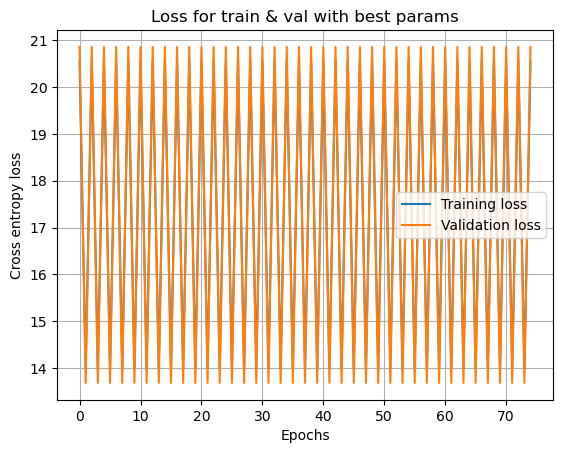

C:\Users\Elias\AppData\Local\Temp\ipykernel_24268\454865446.py:72: RuntimeWarning: overflow encountered in matmul
  hiddenout_diffs = out_deltas @ self.weights2.T
C:\Users\Elias\AppData\Local\Temp\ipykernel_24268\454865446.py:74: RuntimeWarning: invalid value encountered in multiply
  hiddenact_deltas = (hiddenout_diffs[:, 1:] *


Mean accuracy: 0.52, std_dev: 0.10 for 10 runs


In [38]:
print(f"Best params give accuracy: {best_acc}")
print(f"Lr: {best_lr:.2f}\nBest dimension hidden layer: {best_dim}\nBest tol: {best_tol}")

model = MLPBinaryLinRegClass(bias=-1, dim_hidden=best_dim)
model.fit(X_train, t2_train, X_val=X_val, t_val=t2_val, lr=best_lr, epochs=75, tol=best_tol)

loss_train = model.train_loss
loss_val = model.val_losses

plt.plot(loss_train, label='Training loss')
plt.plot(loss_val, label='Validation loss')
plt.title('Loss for train & val with best params')
plt.xlabel('Epochs')
plt.ylabel('Cross entropy loss')
plt.legend()
plt.grid()
plt.show()


def train_best_ntimes(lr, dim, tol, n):
    """Train model with best parameters multiple times and calculate mean accuracy."""
    accs = []
    for i in range(n):
        model = MLPBinaryLinRegClass(bias=-1, dim_hidden=dim)
        model.fit(X_train, t2_train, X_val=X_val, t_val=t2_val, lr=lr, epochs=75, tol=tol)
        acc = model.accuracy(model.predict(X_val), t2_val)
        accs.append(acc)
    
    accs = np.array(accs)
    mean = np.mean(accs)
    std = np.std(accs)

    return mean, std

# Run 10 times and print mean and standard deviation
mean, std = train_best_ntimes(best_lr, best_dim, best_tol, 10)
print(f"Mean accuracy: {mean:.2f}, std_dev: {std:.2f} for 10 runs")


C:\Users\Elias\AppData\Local\Temp\ipykernel_24268\702837997.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


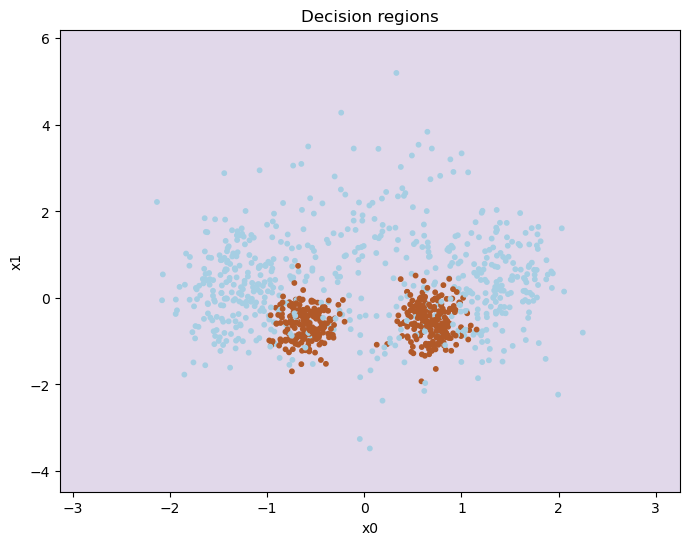

In [ ]:
# plot boundaries

plot_decision_regions(X_train, t2_train, clf=model)
plt.show()

# does not seemd to work well, and loss function just oscialttes like crazy. 

When implemented, this model can be used to make a non-linear classifier for the set `(X, t2)`. Experiment with settings for learning rate and epochs and see how good results you can get. 
Report results for various settings. Be prepared to train for a long time (but you can control it via the number of epochs and hidden size). 

Plot the training set together with the decision regions as in Part I.

# Improving the MLP classifier
You should now make changes to the classifier similarly to what you did with the logistic regression classifier in part 1.

a) In addition to the `predict()` method, which predicts a class for the data, include the `predict_probability()` method which predict the probability of the data belonging to the positive class. The training should be based on these values, as with logistic regression.

b) Calculate the loss and the accuracy after each epoch and store them for inspection after training.

c) Extend the `fit()` method with optional arguments for a validation set `(X_val, t_val)`. If a validation set is included in the call to `fit()`, calculate the loss and the accuracy for the validation set after each epoch.

d) Extend the `fit()` method with two keyword arguments, `tol` (tolerance) and `n_epochs_no_update` and stop training when the loss has not improved for more than `tol` after `n_epochs_no_update`. A possible default value for `n_epochs_no_update` is 5. Add an attribute to the classifier which tells us after fitting how many epochs it was trained on.

e) Tune the hyper-parameters: `lr`, `tol` and `dim-hidden` (size of the hidden layer).
Also, consider the effect of scaling the data.

f) After a succesful training with the best setting for the hyper-parameters, plot both training loss and validation loss as functions of the number of epochs in one figure, and both training and validation accuracies as functions of the number of epochs in another figure. Comment on what you see.

g) The MLP algorithm contains an element of non-determinism. Hence, train the classifier 10 times with the optimal hyper-parameters and report the mean and standard deviation of the accuracies over the 10 runs.

## Multi-class neural network

The goal is to use a feed-forward neural network for non-linear multi-class classfication and apply it to the set `(X, t_multi)`.

Modify the network to become a multi-class classifier. As a sanity check of your implementation, you may apply it to `(X, t_2)` and see whether you get similar results as above.

Train the resulting classifier on `(X_train, t_multi_train)`, test it on `(X_val, t_multi_val)`, tune the hyper-parameters and report the accuracy.

Plot the decision boundaries for your best classifier.

In [45]:
# Multi class neural network - attempt at modify code. Not working

"""
Changes to be made:
1. Output should instead of ouputting just one value (probability), return multiple and use softmax
2. Prediction should choose largest value in lsit of probabilities.
3. 
"""

class MLPBinaryLinRegClass(NumpyClassifier):
    """A multi-layer neural network with one hidden layer"""
    
    def __init__(self, bias=-1, dim_hidden = 6, classes = 3):
        """Intialize the hyperparameters"""
        self.bias = bias
        # Dimensionality of the hidden layer
        self.dim_hidden = dim_hidden
        self.n_classes = classes
        
        self.activ = logistic
        
        self.activ_diff = logistic_diff
        
    def forward_(self, X):
        """TODO: 
        Perform one forward step. 
        Return a pair consisting of the outputs of the hidden_layer
        and the outputs on the final layer"""
        
        hidden_outs = X @ self.weights1
        hidden_ = add_bias(hidden_outs, self.bias)
        outputs = hidden_ @ self.weights2
        probs = self.softmax(outputs) #apply softmax to outputs
        return hidden_outs, probs
    
    def forward(self, X):
        """Perform one forward step and return the outputs of the hidden and final layers."""
        # Calculate the output of the hidden layer
        hidden_outs = self.activ(X @ self.weights1)
        # Add bias term to the hidden layer's output
        hidden_outs_bias = add_bias(hidden_outs, self.bias)
        # Calculate the final layer output
        outputs = hidden_outs_bias @ self.weights2
        return hidden_outs_bias, outputs
    
    def fit(self, X_train, t_train, X_val=None, t_val=None, lr=0.001, epochs = 100, n_epochs_no_update = 10, tol = 0.001):
        """Initialize the weights. Train *epochs* many epochs.
        
        X_train is a NxM matrix, N data points, M features
        t_train is a vector of length N of targets values for the training data, 
        where the values are 0 or 1.
        lr is the learning rate
        """
        self.lr = lr
        self.train_loss = []
        self.train_acc = []
        self.val_losses = []
        self.val_accs = []
        
        # Turn t_train into a column vector, a N*1 matrix:
        T_train = t_train.reshape(-1,1)
            
        dim_in = X_train.shape[1] 
        dim_out = T_train.shape[1]
        
        # Initialize the weights
        self.weights1 = (np.random.rand(
            dim_in + 1, 
            self.dim_hidden) * 2 - 1)/np.sqrt(dim_in)
        self.weights2 = (np.random.rand(
            self.dim_hidden+1, 
            dim_out) * 2 - 1)/np.sqrt(self.dim_hidden)
        X_train_bias = add_bias(X_train, self.bias)
        
        epochs_w_noImprovement = 0
        for e in range(epochs):
            # One epoch
            # The forward step:
            hidden_outs, outputs = self.forward(X_train_bias)
            # The delta term on the output node:
            out_deltas = (outputs - T_train)
            # The delta terms at the output of the hidden layer:
            hiddenout_diffs = out_deltas @ self.weights2.T
            # The deltas at the input to the hidden layer:
            hiddenact_deltas = (hiddenout_diffs[:, 1:] * 
                                self.activ_diff(hidden_outs[:, 1:]))  

            # Update the weights:
            self.weights2 -= self.lr * hidden_outs.T @ out_deltas
            self.weights1 -= self.lr * X_train_bias.T @ hiddenact_deltas

            tr_loss = self.cross_entropy(t_val , self.predict_probability(X_train)) #loss is cross entropy of targets vs output of model proability
            self.train_loss.append(tr_loss)
            tr_acc = self.accuracy(self.predict(X_train), t_train)

            if X_val is not None:
                val_loss = self.cross_entropy(t_val, self.predict_probability(X_val))
                self.val_losses.append(val_loss)
                val_acc = self.accuracy(self.predict(X_val), t_val)
                self.val_accs.append(val_acc)

            if (abs( min(self.train_loss) - tr_loss) ) < tol:
                epochs_w_noImprovement +=1
                if epochs_w_noImprovement == n_epochs_no_update:
                    #print(f"No longer imrpoves at {epoch}")
                    break
                    #continue
            else:
                epochs_w_noImprovement = 0 #reset if there has been big improvement

            

    def predict(self, X):
        """Predict the class for the members of X"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        return np.argmax(forw, axis=1) #return class corresponding to to highest probability

    def predict_probability(self, X):
        """Add bias and send output of forward into activation sigmoid to get probability"""
        Z = add_bias(X, self.bias)
        forw = self.forward(Z)[1]
        prob = logistic(forw)
        return prob
    
    def cross_entropy(self, t, probs):
        """Cross-entropy loss using probabilities directly, gpt help."""
        one_hot_targets = np.eye(probs.shape[1])[t]
        loss = -np.mean(np.sum(one_hot_targets * np.log(probs + 1e-15), axis=1))
        return loss

    
    def accuracy(self, y, t):
        """Calculate the accuracy of the model, model output and target"""
        # From week05 solution, vector solution
        return np.mean( y == t )
    

    def softmax(self, logits):
        """Apply softmax to get probabilities, gpt."""
        exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Part III: Final testing
We can now perform a final testing on the held-out test set we created in the beginning.

## Binary task (X, t2)
Consider the linear regression classifier, the logistic regression classifier and the multi-layer network with the best settings you found. Train each of them on the training set and evaluate on the held-out test set, but also on the validation set and the training set. Report the performance in a 3 by 3 table.

Comment on what you see. How do the three different algorithms compare? Also, compare the results between the different dataset splits. In cases like these, one might expect slightly inferior results on the held-out test data compared to the validation and training data. Is this the case? 

Also report precision and recall for class 1.

## Multi-class task (X, t_multi)

Compare the three multi-class classifiers, the one-vs-rest and the multinomial logistic regression from part one and the multi-class neural network from part two. Evaluate on test, validation and training set as above.

Comment on the results.

Good luck!